In [1]:
from src.core.training.training_utils import download_training_data, load_model_from_artifact
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

def load_data(input_folder, input_name):
    df = pd.read_feather(input_folder + input_name)
    df["target_5_multiplied"] = df["target_5"]*1000
    # training, test, validation
    return df[df.type=="training"], df[df.type=="validation"], df[df.type=="validation_unseen"]


In [3]:
file, folder = "training_all_crypto.feather", "../temp/"
project_name = "run5"
entity_name = "pab_lo4"
load_model_config = {
    "entity": "pab_lo4",
    "project": "run5_grid_search",
    "model_name": "NeuralNetwork",
    "model_version": "v130",
    "model_format": ".pickle"
    }    
df_training, df_test, df_validation = load_data(folder, file)
columns_features = [col for col in df_training.columns if col.startswith("feature_domain")]
columns_target = [col for col in df_training.columns if col.startswith("target")]
columns_target = ["target_5_multiplied"]


pipe = load_model_from_artifact(**load_model_config)

wandb: Currently logged in as: pab_lo4 (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.12.6 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


In [4]:
df_validation["preds"] = pipe.predict(df_validation[columns_features])

In [5]:
df_validation

,index,Unnamed: 0,date,time,open,high,low,close,vwap,volume,...,feature_domain_32,feature_domain_33,feature_domain_34,feature_domain_35,feature_domain_36,feature_domain_37,type,pair_name,target_5_multiplied,preds
45920,45920,45920,2021-10-25 12:37:00,1635165420,0.325421,0.325421,0.325421,0.325421,0.000000,0.000000,...,-0.000218,0.000178,0.000347,-0.000725,-0.001307,0.006635,validation_unseen,xlmeur,0.338138,-0.035638
45921,45921,45921,2021-10-25 12:38:00,1635165480,0.325421,0.325421,0.325421,0.325421,0.000000,0.000000,...,-0.000218,-0.000550,0.000347,-0.000725,0.000028,0.005879,validation_unseen,xlmeur,0.341213,0.052256
45922,45922,45922,2021-10-25 12:39:00,1635165540,0.325421,0.325421,0.325421,0.325421,0.325421,3372.851878,...,-0.000218,-0.000369,0.000261,-0.000725,0.000169,0.005879,validation_unseen,xlmeur,0.119859,0.034475
45923,45923,45923,2021-10-25 12:40:00,1635165600,0.325420,0.325421,0.325386,0.325402,0.325401,9189.663580,...,0.000984,-0.000602,0.000258,-0.000728,0.000194,0.005177,validation_unseen,xlmeur,0.335064,0.010657
45924,45924,45924,2021-10-25 12:41:00,1635165660,0.325310,0.325310,0.325310,0.325310,0.325310,2000.000000,...,-0.000353,-0.000731,-0.000080,-0.001066,-0.000144,0.004837,validation_unseen,xlmeur,-0.341097,-0.037850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403680,46101,46101,2021-10-25 14:11:00,1635171060,0.940470,0.940470,0.940470,0.940470,0.940470,151.290426,...,0.000245,0.003361,0.001672,0.002676,0.000500,-0.002334,validation_unseen,xrpeur,1.416189,0.139073
403681,46102,46102,2021-10-25 14:12:00,1635171120,0.940400,0.940400,0.940400,0.940400,0.940400,26.500000,...,-0.001041,0.002815,0.001790,0.002292,0.000511,-0.002852,validation_unseen,xrpeur,1.352315,0.043196
403682,46103,46103,2021-10-25 14:13:00,1635171180,0.940350,0.940350,0.940350,0.940350,0.940350,36.156800,...,-0.000839,0.002708,0.002003,0.002377,0.000553,-0.002842,validation_unseen,xrpeur,0.894083,0.064685
403683,46104,46104,2021-10-25 14:14:00,1635171240,0.940030,0.940090,0.939900,0.939900,0.939910,23969.177590,...,-0.000521,0.002677,0.001620,0.002218,0.000128,-0.003636,validation_unseen,xrpeur,0.553480,-0.029558


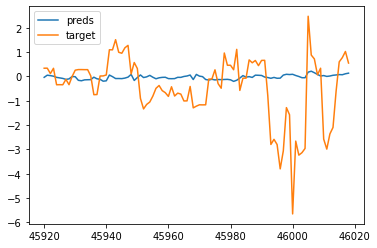

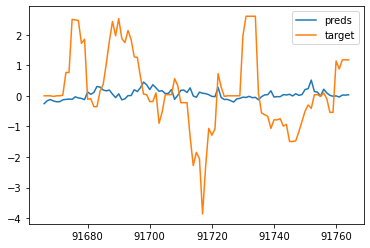

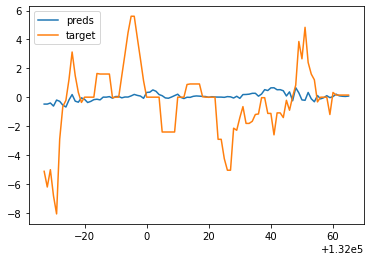

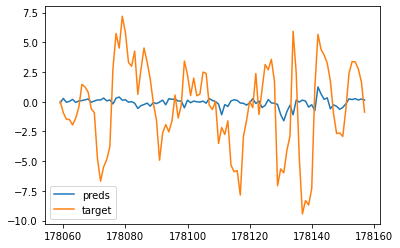

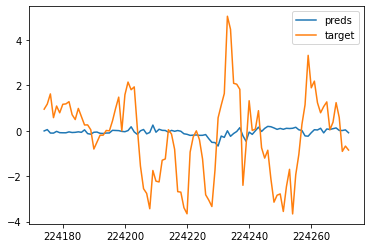

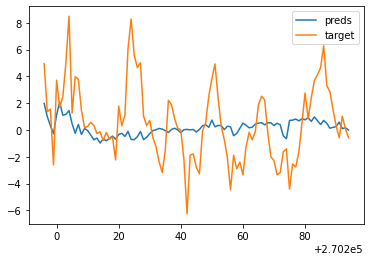

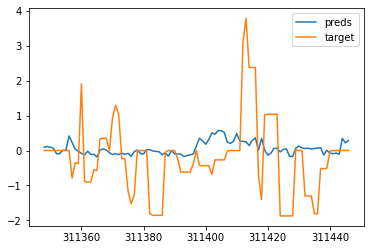

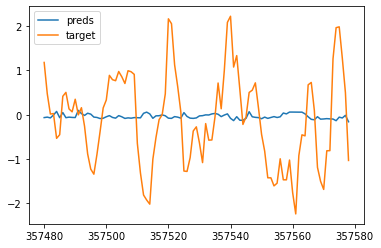

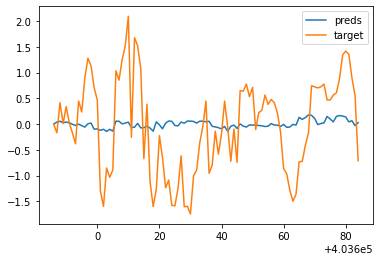

In [6]:
for pair_name in df_validation.pair_name.unique():
    plt.plot(df_validation[df_validation.pair_name==pair_name]["preds"], label="preds")
    plt.plot(df_validation[df_validation.pair_name==pair_name]["target_5_multiplied"], label="target")
    plt.legend()
    plt.show()